In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from itertools import product

from scipy.stats import linregress

import sys
sys.path.append('../../funcs')
sys.path.append('../../constants')
from taus import decorrelation_temporal_model, fit_coh_decay_model
from xarray_tools import find_cor_ts
from colors import loc_colors

In [5]:
dss = {fp.stem.split('_')[0]: xr.open_dataset(fp) for fp in sorted(list(Path('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsars').glob('*_tau.nc'))) if 'lowman' not in fp.stem}

home_dir = Path('/Users/rdcrlzh1/Documents/uavsar-coherence')
fig_dir = home_dir.joinpath('figures', 'non-snow')

In [6]:
for stem, ds in dss.items():
    print(stem)
    print(ds.heading)

dorado
<xarray.DataArray 'heading' (heading: 1)>
array([340])
Coordinates:
  * heading      (heading) int64 340
    spatial_ref  int64 ...
grmesa
<xarray.DataArray 'heading' (heading: 1)>
array([274])
Coordinates:
  * heading      (heading) int64 274
    spatial_ref  int64 ...
silver
<xarray.DataArray 'heading' (heading: 1)>
array([347])
Coordinates:
  * heading      (heading) int64 347
    spatial_ref  int64 ...


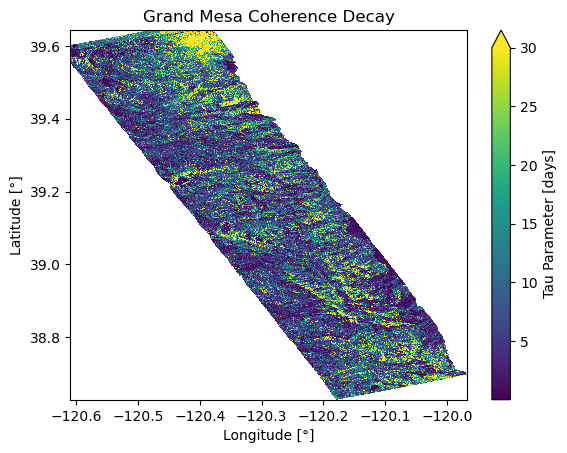

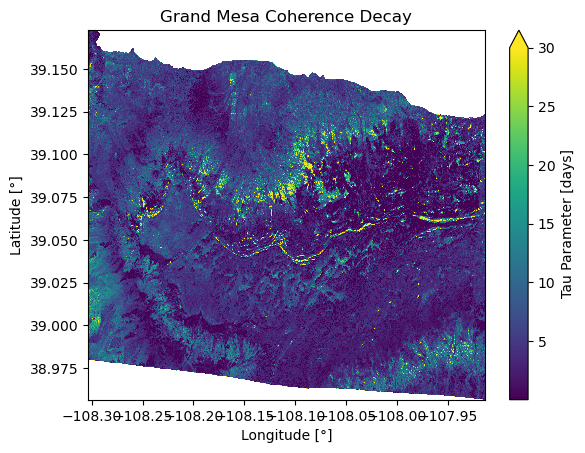

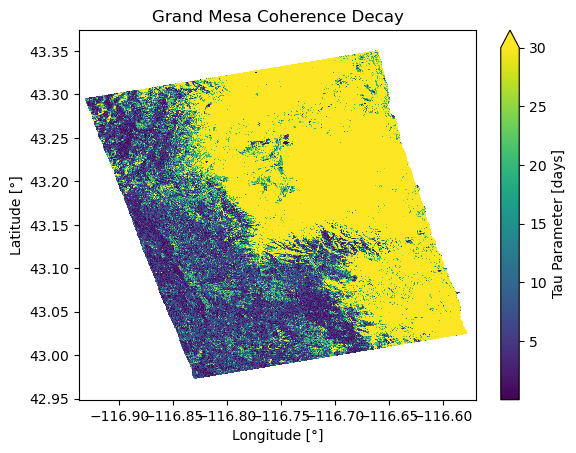

In [9]:
res = pd.DataFrame(index = pd.MultiIndex(levels = [[], [], []], codes = [[], [],[]], names = ['site', 'dt', 'pol']), columns = ['25', '50', '75'])

lc_dic = {'water': [11,11], 'developed': [21,24], 'forest': [41, 43], 'shrub': [51, 52], 'herbaceous': [71, 74]}

for stem, ds in dss.items():
    # ts = find_cor_ts(ds)

    # for heading, t1, t2 in ts:
        # print(heading)
    ds['curvefit_coefficients'].sel(param = 'tau', pol = 'VV').plot(vmax = 30, cbar_kwargs = {'label': 'Tau Parameter [days]'})
    plt.gca().set_title('Grand Mesa Coherence Decay')
    ax = plt.gca()
    ax.set_xlabel('Longitude [°]')
    ax.set_ylabel('Latitude [°]')
    plt.show()